# Text Anonymization Benchmark (TAB) Dataset Analysis

This notebook provides a comprehensive analysis of the Text Anonymization Benchmark (TAB) dataset attributes. We'll explore the structure, content, and characteristics of the dataset to understand the annotation scheme and data distribution.

## Dataset Overview
The TAB dataset contains 1,268 English-language court cases from the European Court of Human Rights (ECHR), manually annotated with:
- Semantic categories for personal identifiers
- Masking decisions based on re-identification risk
- Confidential attributes
- Co-reference relations

In [1]:
# Import Required Libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import inspect
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')
sns.set_palette("husl")

## 1. Loading Dataset Files

Let's start by loading the three dataset splits and examining their basic properties.

In [2]:
# Load dataset files
datasets = {}
file_names = ['echr_train.json', 'echr_dev.json', 'echr_test.json']

for file_name in file_names:
    print(f"Loading {file_name}...")
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            data = json.load(f)
            split_name = file_name.replace('echr_', '').replace('.json', '')
            datasets[split_name] = data
            print(f"✓ Loaded {len(data)} documents from {file_name}")
    except Exception as e:
        print(f"✗ Error loading {file_name}: {e}")

print(f"\nDataset splits loaded: {list(datasets.keys())}")
print(f"Total documents: {sum(len(docs) for docs in datasets.values())}")

Loading echr_train.json...
✓ Loaded 1014 documents from echr_train.json
Loading echr_dev.json...
✓ Loaded 127 documents from echr_dev.json
Loading echr_test.json...
✓ Loaded 127 documents from echr_test.json

Dataset splits loaded: ['train', 'dev', 'test']
Total documents: 1268
✓ Loaded 1014 documents from echr_train.json
Loading echr_dev.json...
✓ Loaded 127 documents from echr_dev.json
Loading echr_test.json...
✓ Loaded 127 documents from echr_test.json

Dataset splits loaded: ['train', 'dev', 'test']
Total documents: 1268


## 2. Document Structure Analysis

Let's examine the structure of individual documents and print their main attributes.

In [3]:
# Examine the first document from the dev set
if 'dev' in datasets and len(datasets['dev']) > 0:
    sample_doc = datasets['dev'][0]
    
    print("=== DOCUMENT ATTRIBUTES ===")
    print("Document keys (top-level attributes):")
    for key in sample_doc.keys():
        print(f"  - {key}: {type(sample_doc[key])}")
    
    print("\n=== DOCUMENT ATTRIBUTE VALUES ===")
    for key, value in sample_doc.items():
        if key == 'text':
            print(f"\n{key}: (text length: {len(value)} characters)")
            print(f"  Preview: {value[:200]}...")
        elif key == 'annotations':
            print(f"\n{key}: {type(value)}")
            if isinstance(value, dict):
                print(f"  Annotators: {list(value.keys())}")
                if 'annotator1' in value:
                    annotator_data = value['annotator1']
                    print(f"  Annotator1 keys: {list(annotator_data.keys())}")
                    if 'entity_mentions' in annotator_data:
                        print(f"  Number of entity mentions: {len(annotator_data['entity_mentions'])}")
        else:
            print(f"\n{key}: {value}")
else:
    print("No documents found in dev set")

=== DOCUMENT ATTRIBUTES ===
Document keys (top-level attributes):
  - annotations: <class 'dict'>
  - quality_checked: <class 'list'>
  - text: <class 'str'>
  - task: <class 'str'>
  - meta: <class 'dict'>
  - doc_id: <class 'str'>
  - dataset_type: <class 'str'>

=== DOCUMENT ATTRIBUTE VALUES ===

annotations: <class 'dict'>
  Annotators: ['annotator1', 'annotator10']
  Annotator1 keys: ['entity_mentions']
  Number of entity mentions: 38

quality_checked: ['annotator10']

text: (text length: 3407 characters)
  Preview: PROCEDURE

The case originated in an application (no. 40593/04) against the Republic of Turkey lodged with the Court under Article 34 of the Convention for the Protection of Human Rights and Fundament...

task: Task: Annotate the document to anonymise the following person: Cengiz Polat

meta: {'year': 2007, 'legal_branch': 'CHAMBER', 'articles': [91, 34, 54, 34, 44, 32, 34, 53, 34, 93], 'countries': 'TUR', 'applicant': 'Cengiz Polat'}

doc_id: 001-83927

dataset_type: 

## 3. Entity Mention Attributes Analysis

Now let's dive deeper into the entity mention structure and examine all their attributes.

In [4]:
# Examine entity mention attributes
if 'dev' in datasets and len(datasets['dev']) > 0:
    sample_doc = datasets['dev'][0]
    
    if 'annotations' in sample_doc and 'annotator1' in sample_doc['annotations']:
        entity_mentions = sample_doc['annotations']['annotator1']['entity_mentions']
        
        print("=== ENTITY MENTION ATTRIBUTES ===")
        if len(entity_mentions) > 0:
            sample_mention = entity_mentions[0]
            print("Entity mention attributes:")
            for attr, value in sample_mention.items():
                print(f"  - {attr}: {value} ({type(value).__name__})")
            
            print(f"\n=== SAMPLE ENTITY MENTIONS ===")
            print(f"Showing first 5 entity mentions out of {len(entity_mentions)}:")
            
            for i, mention in enumerate(entity_mentions[:5]):
                print(f"\n--- Mention {i+1} ---")
                for attr, value in mention.items():
                    if attr == 'span_text':
                        print(f"  {attr}: '{value}'")
                    else:
                        print(f"  {attr}: {value}")
        else:
            print("No entity mentions found in this document")
    else:
        print("No annotations found in sample document")

=== ENTITY MENTION ATTRIBUTES ===
Entity mention attributes:
  - entity_type: CODE (str)
  - entity_mention_id: 001-83927_a1_em1 (str)
  - start_offset: 54 (int)
  - end_offset: 62 (int)
  - span_text: 40593/04 (str)
  - edit_type: check (str)
  - identifier_type: DIRECT (str)
  - entity_id: 001-83927_a1_e1 (str)
  - confidential_status: NOT_CONFIDENTIAL (str)

=== SAMPLE ENTITY MENTIONS ===
Showing first 5 entity mentions out of 38:

--- Mention 1 ---
  entity_type: CODE
  entity_mention_id: 001-83927_a1_em1
  start_offset: 54
  end_offset: 62
  span_text: '40593/04'
  edit_type: check
  identifier_type: DIRECT
  entity_id: 001-83927_a1_e1
  confidential_status: NOT_CONFIDENTIAL

--- Mention 2 ---
  entity_type: ORG
  entity_mention_id: 001-83927_a1_em2
  start_offset: 76
  end_offset: 94
  span_text: 'Republic of Turkey'
  edit_type: insert
  confidential_status: NOT_CONFIDENTIAL
  identifier_type: NO_MASK
  entity_id: 001-83927_a1_e2

--- Mention 3 ---
  entity_type: DEM
  entity_me

## 4. Comprehensive Attribute Analysis

Let's analyze all unique attributes and their possible values across the entire dataset.

In [5]:
# Collect all attribute values across the dataset
def analyze_attributes(datasets):
    """Analyze all attributes and their values across the dataset"""
    
    # Document-level attributes
    doc_attributes = defaultdict(set)
    
    # Entity mention attributes
    entity_attributes = defaultdict(set)
    
    # Metadata attributes
    meta_attributes = defaultdict(set)
    
    total_docs = 0
    total_mentions = 0
    
    for split_name, documents in datasets.items():
        print(f"\nAnalyzing {split_name} split ({len(documents)} documents)...")
        
        for doc in documents:
            total_docs += 1
            
            # Collect document attributes
            for key, value in doc.items():
                if key == 'meta' and isinstance(value, dict):
                    # Collect metadata attributes
                    for meta_key, meta_value in value.items():
                        meta_attributes[meta_key].add(str(meta_value))
                elif key != 'annotations' and key != 'text':
                    doc_attributes[key].add(str(value))
            
            # Collect entity mention attributes
            if 'annotations' in doc:
                for annotator, annotations in doc['annotations'].items():
                    if 'entity_mentions' in annotations:
                        for mention in annotations['entity_mentions']:
                            total_mentions += 1
                            for attr_name, attr_value in mention.items():
                                entity_attributes[attr_name].add(str(attr_value))
    
    return doc_attributes, entity_attributes, meta_attributes, total_docs, total_mentions

# Run the analysis
print("=== ANALYZING ALL ATTRIBUTES ===")
doc_attrs, entity_attrs, meta_attrs, total_docs, total_mentions = analyze_attributes(datasets)

print(f"\nDataset Summary:")
print(f"  Total documents: {total_docs}")
print(f"  Total entity mentions: {total_mentions}")
print(f"  Average mentions per document: {total_mentions/total_docs:.2f}")

=== ANALYZING ALL ATTRIBUTES ===

Analyzing train split (1014 documents)...

Analyzing dev split (127 documents)...

Analyzing test split (127 documents)...

Dataset Summary:
  Total documents: 1268
  Total entity mentions: 155006
  Average mentions per document: 122.24

Analyzing dev split (127 documents)...

Analyzing test split (127 documents)...

Dataset Summary:
  Total documents: 1268
  Total entity mentions: 155006
  Average mentions per document: 122.24


In [6]:
# Print document-level attributes
print("\n" + "="*50)
print("DOCUMENT-LEVEL ATTRIBUTES")
print("="*50)

for attr_name, values in sorted(doc_attrs.items()):
    print(f"\n📄 {attr_name.upper()}:")
    print(f"   Number of unique values: {len(values)}")
    
    # Show all values if there are few, otherwise show a sample
    if len(values) <= 10:
        for value in sorted(values):
            print(f"   - {value}")
    else:
        sorted_values = sorted(values)
        print(f"   Sample values:")
        for value in sorted_values[:5]:
            print(f"   - {value}")
        print(f"   ... and {len(values) - 5} more values")


DOCUMENT-LEVEL ATTRIBUTES

📄 DATASET_TYPE:
   Number of unique values: 3
   - dev
   - test
   - train

📄 DOC_ID:
   Number of unique values: 1268
   Sample values:
   - 001-100018
   - 001-100188
   - 001-100393
   - 001-100487
   - 001-100506
   ... and 1263 more values

📄 QUALITY_CHECKED:
   Number of unique values: 34
   Sample values:
   - ['annotator1', 'annotator2', 'annotator12']
   - ['annotator1', 'annotator3', 'annotator5', 'annotator12']
   - ['annotator1', 'annotator5', 'annotator12']
   - ['annotator1']
   - ['annotator10']
   ... and 29 more values

📄 TASK:
   Number of unique values: 1254
   Sample values:
   - Task: Annotate the document to anonymise the following person: A. Mackay
   - Task: Annotate the document to anonymise the following person: Abbas Sertkaya
   - Task: Annotate the document to anonymise the following person: Abbas Şaylı
   - Task: Annotate the document to anonymise the following person: Abdisamad Adow Sufi
   - Task: Annotate the document to anon

In [7]:
# Print entity mention attributes
print("\n" + "="*50)
print("ENTITY MENTION ATTRIBUTES")
print("="*50)

for attr_name, values in sorted(entity_attrs.items()):
    print(f"\n🏷️  {attr_name.upper()}:")
    print(f"   Number of unique values: {len(values)}")
    
    # Show all values if there are few, otherwise show a sample
    if len(values) <= 15:
        for value in sorted(values):
            if len(value) > 50:  # Truncate very long values
                print(f"   - {value[:50]}...")
            else:
                print(f"   - {value}")
    else:
        sorted_values = sorted(values)
        print(f"   Sample values:")
        for value in sorted_values[:8]:
            if len(value) > 50:
                print(f"   - {value[:50]}...")
            else:
                print(f"   - {value}")
        print(f"   ... and {len(values) - 8} more values")


ENTITY MENTION ATTRIBUTES

🏷️  CONFIDENTIAL_STATUS:
   Number of unique values: 6
   - BELIEF
   - ETHNIC
   - HEALTH
   - NOT_CONFIDENTIAL
   - POLITICS
   - SEX

🏷️  EDIT_TYPE:
   Number of unique values: 3
   - check
   - correct
   - insert

🏷️  END_OFFSET:
   Number of unique values: 18569
   Sample values:
   - 100
   - 1000
   - 10000
   - 10001
   - 10002
   - 10003
   - 10004
   - 10005
   ... and 18561 more values

🏷️  ENTITY_ID:
   Number of unique values: 108151
   Sample values:
   - 001-100018_a10_e1
   - 001-100018_a10_e10
   - 001-100018_a10_e11
   - 001-100018_a10_e12
   - 001-100018_a10_e13
   - 001-100018_a10_e14
   - 001-100018_a10_e15
   - 001-100018_a10_e16
   ... and 108143 more values

🏷️  ENTITY_MENTION_ID:
   Number of unique values: 155006
   Sample values:
   - 001-100018_a10_em1
   - 001-100018_a10_em10
   - 001-100018_a10_em11
   - 001-100018_a10_em12
   - 001-100018_a10_em13
   - 001-100018_a10_em14
   - 001-100018_a10_em15
   - 001-100018_a10_em16
   ..

In [8]:
# Print metadata attributes
print("\n" + "="*50)
print("METADATA ATTRIBUTES")
print("="*50)

for attr_name, values in sorted(meta_attrs.items()):
    print(f"\n📊 {attr_name.upper()}:")
    print(f"   Number of unique values: {len(values)}")
    
    # Show all values if there are few, otherwise show a sample
    if len(values) <= 10:
        for value in sorted(values):
            print(f"   - {value}")
    else:
        sorted_values = sorted(values)
        print(f"   Sample values:")
        for value in sorted_values[:5]:
            print(f"   - {value}")
        print(f"   ... and {len(values) - 5} more values")


METADATA ATTRIBUTES

📊 APPLICANT:
   Number of unique values: 1254
   Sample values:
   - A. Mackay
   - Abbas Sertkaya
   - Abbas Şaylı
   - Abdisamad Adow Sufi
   - Abdulaziz Akıntı
   ... and 1249 more values

📊 ARTICLES:
   Number of unique values: 299
   Sample values:
   - [91, 34, 112, 49, 45, 49, 34, 44, 32, 34, 49, 52, 34, 93]
   - [91, 34, 112, 49, 45, 49, 34, 44, 32, 34, 51, 52, 34, 44, 32, 34, 51, 53, 34, 44, 32, 34, 49, 52, 34, 93]
   - [91, 34, 112, 49, 45, 49, 34, 44, 32, 34, 52, 34, 44, 32, 34, 49, 52, 34, 44, 32, 34, 52, 49, 34, 93]
   - [91, 34, 112, 49, 45, 49, 34, 44, 32, 34, 52, 49, 34, 44, 32, 34, 56, 34, 44, 32, 34, 49, 52, 34, 93]
   - [91, 34, 112, 49, 45, 49, 34, 44, 32, 34, 54, 34, 44, 32, 34, 50, 57, 34, 93]
   ... and 294 more values

📊 COUNTRIES:
   Number of unique values: 17
   Sample values:
   - AUT
   - AUT;SVN
   - BEL
   - CHE
   - DEU
   ... and 12 more values

📊 LEGAL_BRANCH:
   Number of unique values: 2
   - CHAMBER
   - GRANDCHAMBER

📊 YEAR:
 

## 5. Statistical Analysis and Visualizations

Let's create visualizations to better understand the distribution of different attributes.

=== ENTITY TYPE DISTRIBUTION ===


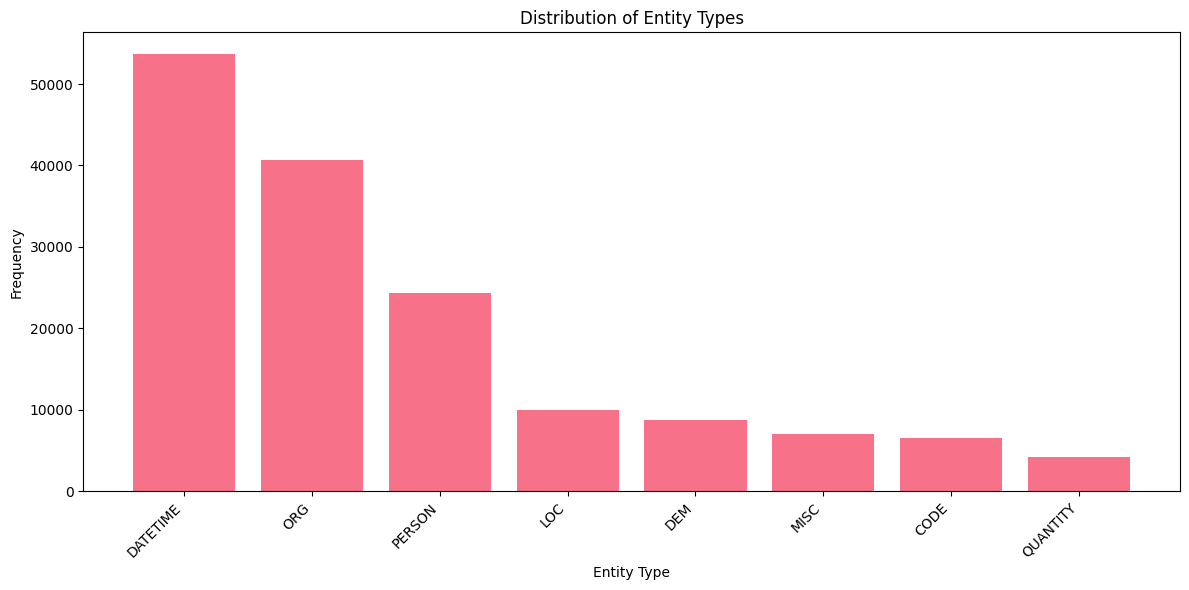


ENTITY_TYPE Distribution:
  DATETIME: 53668 (34.6%)
  ORG: 40695 (26.3%)
  PERSON: 24322 (15.7%)
  LOC: 9982 (6.4%)
  DEM: 8683 (5.6%)
  MISC: 7044 (4.5%)
  CODE: 6471 (4.2%)
  QUANTITY: 4141 (2.7%)

=== IDENTIFIER TYPE DISTRIBUTION ===


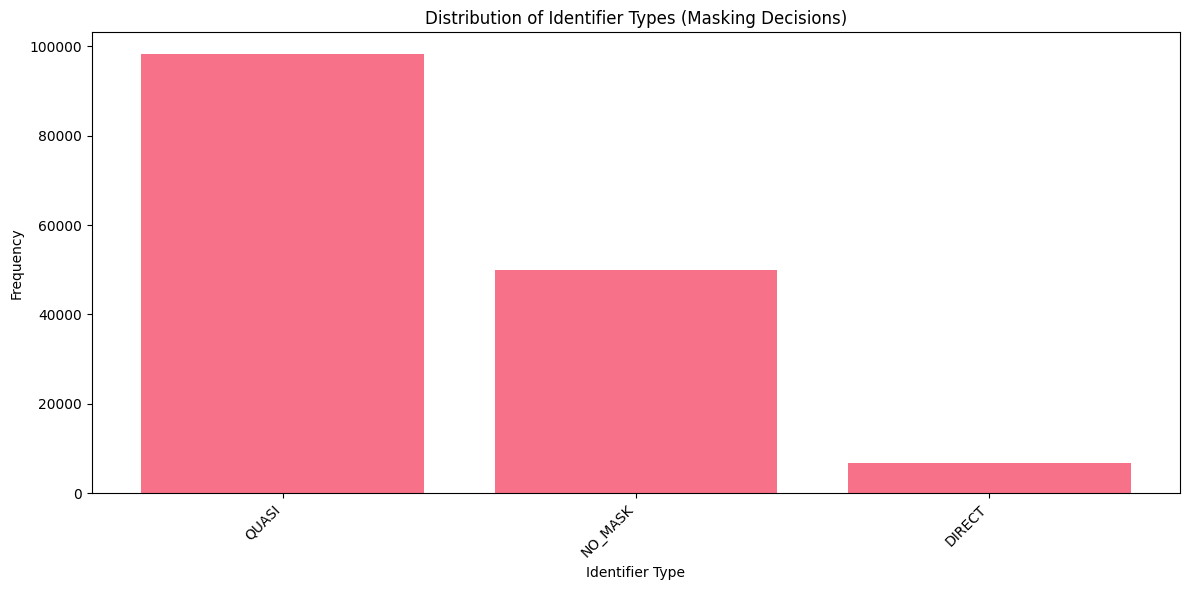


IDENTIFIER_TYPE Distribution:
  QUASI: 98244 (63.4%)
  NO_MASK: 50023 (32.3%)
  DIRECT: 6739 (4.3%)


In [9]:
# Create visualizations for key attributes
def plot_attribute_distribution(datasets, attribute_name, title):
    """Plot distribution of a specific attribute across the dataset"""
    values = []
    
    for split_name, documents in datasets.items():
        for doc in documents:
            if 'annotations' in doc:
                for annotator, annotations in doc['annotations'].items():
                    if 'entity_mentions' in annotations:
                        for mention in annotations['entity_mentions']:
                            if attribute_name in mention:
                                values.append(mention[attribute_name])
    
    # Count occurrences
    value_counts = Counter(values)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Sort by frequency
    sorted_items = sorted(value_counts.items(), key=lambda x: x[1], reverse=True)
    labels, counts = zip(*sorted_items) if sorted_items else ([], [])
    
    plt.bar(range(len(labels)), counts)
    plt.xlabel(attribute_name.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{attribute_name.upper()} Distribution:")
    for label, count in sorted_items:
        percentage = (count / sum(counts)) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")

# Plot entity type distribution
print("=== ENTITY TYPE DISTRIBUTION ===")
plot_attribute_distribution(datasets, 'entity_type', 'Distribution of Entity Types')

print("\n" + "="*50)
print("=== IDENTIFIER TYPE DISTRIBUTION ===")
plot_attribute_distribution(datasets, 'identifier_type', 'Distribution of Identifier Types (Masking Decisions)')


=== CONFIDENTIAL STATUS DISTRIBUTION ===


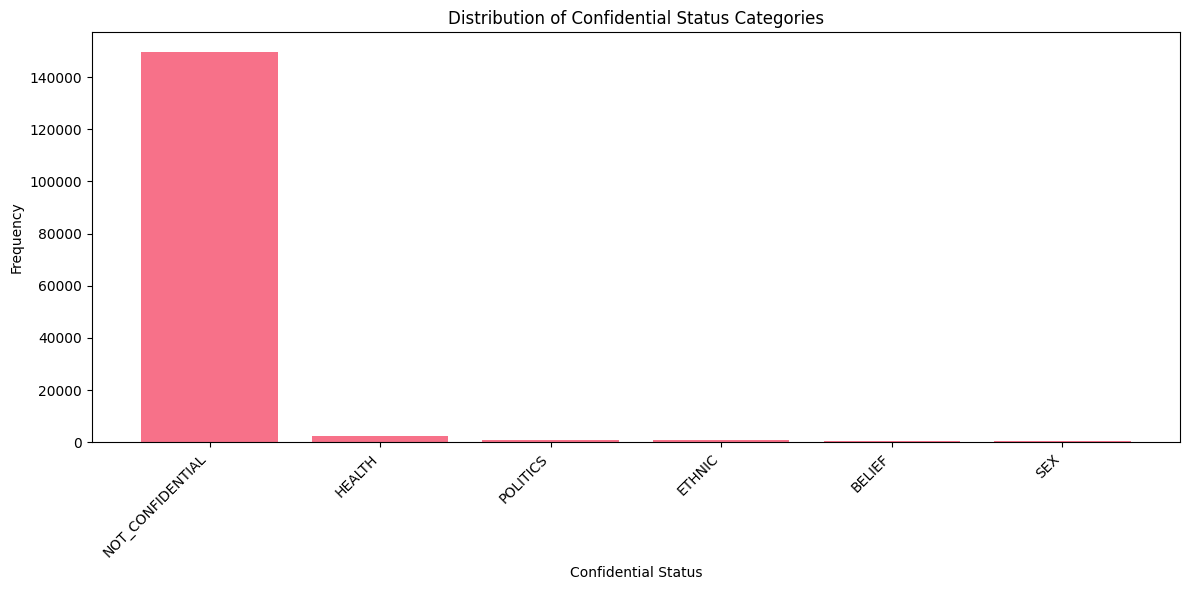


CONFIDENTIAL_STATUS Distribution:
  NOT_CONFIDENTIAL: 149670 (96.6%)
  HEALTH: 2320 (1.5%)
  POLITICS: 1039 (0.7%)
  ETHNIC: 806 (0.5%)
  BELIEF: 655 (0.4%)
  SEX: 516 (0.3%)

=== DATASET SPLIT STATISTICS ===
       documents  mentions  avg_mentions_per_doc
train     1014.0   95030.0                 93.72
dev        127.0   29435.0                231.77
test       127.0   30541.0                240.48


In [10]:
# Analyze confidential status distribution
print("\n" + "="*50)
print("=== CONFIDENTIAL STATUS DISTRIBUTION ===")
plot_attribute_distribution(datasets, 'confidential_status', 'Distribution of Confidential Status Categories')

# Dataset split statistics
print("\n" + "="*50)
print("=== DATASET SPLIT STATISTICS ===")

split_stats = {}
for split_name, documents in datasets.items():
    total_mentions = 0
    for doc in documents:
        if 'annotations' in doc:
            for annotator, annotations in doc['annotations'].items():
                if 'entity_mentions' in annotations:
                    total_mentions += len(annotations['entity_mentions'])
    
    split_stats[split_name] = {
        'documents': len(documents),
        'mentions': total_mentions,
        'avg_mentions_per_doc': total_mentions / len(documents) if documents else 0
    }

# Create DataFrame for better display
stats_df = pd.DataFrame(split_stats).T
print(stats_df.round(2))

## 6. Summary and Key Findings

This analysis has revealed the comprehensive structure and rich annotation scheme of the Text Anonymization Benchmark dataset.

In [11]:
# Final summary
print("=== TAB DATASET ATTRIBUTE SUMMARY ===")
print("\n📊 DATASET OVERVIEW:")
print(f"   • Total documents: {sum(len(docs) for docs in datasets.values())}")
print(f"   • Dataset splits: {', '.join(datasets.keys())}")

print("\n📄 DOCUMENT-LEVEL ATTRIBUTES:")
for attr in sorted(doc_attrs.keys()):
    print(f"   • {attr}")

print("\n🏷️  ENTITY MENTION ATTRIBUTES:")
for attr in sorted(entity_attrs.keys()):
    print(f"   • {attr}")

print("\n📋 METADATA ATTRIBUTES:")
for attr in sorted(meta_attrs.keys()):
    print(f"   • {attr}")

print("\n🎯 KEY ANNOTATION CATEGORIES:")
print("   • Entity Types:", len(entity_attrs.get('entity_type', set())), "categories")
print("   • Identifier Types:", len(entity_attrs.get('identifier_type', set())), "categories") 
print("   • Edit Types:", len(entity_attrs.get('edit_type', set())), "categories")
print("   • Confidential Status:", len(entity_attrs.get('confidential_status', set())), "categories")

print("\n✨ This dataset provides rich annotations for:")
print("   • Privacy-preserving text anonymization research")
print("   • Named entity recognition and classification")
print("   • Re-identification risk assessment")
print("   • Legal document processing")
print("   • Multi-level annotation analysis")

=== TAB DATASET ATTRIBUTE SUMMARY ===

📊 DATASET OVERVIEW:
   • Total documents: 1268
   • Dataset splits: train, dev, test

📄 DOCUMENT-LEVEL ATTRIBUTES:
   • dataset_type
   • doc_id
   • quality_checked
   • task

🏷️  ENTITY MENTION ATTRIBUTES:
   • confidential_status
   • edit_type
   • end_offset
   • entity_id
   • entity_mention_id
   • entity_type
   • identifier_type
   • related_mentions
   • span_text
   • start_offset

📋 METADATA ATTRIBUTES:
   • applicant
   • articles
   • countries
   • legal_branch
   • year

🎯 KEY ANNOTATION CATEGORIES:
   • Entity Types: 8 categories
   • Identifier Types: 3 categories
   • Edit Types: 3 categories
   • Confidential Status: 6 categories

✨ This dataset provides rich annotations for:
   • Privacy-preserving text anonymization research
   • Named entity recognition and classification
   • Re-identification risk assessment
   • Legal document processing
   • Multi-level annotation analysis


## 7. PII Detection Training with BERT

Now let's implement a modern PII detection system using a BERT-based model with Hugging Face Transformers and PyTorch. We'll use the MPS backend for efficient training on Apple Silicon.

In [12]:
# Additional imports for PII detection training
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import (
    AutoTokenizer, AutoModelForTokenClassification,
    TrainingArguments, Trainer, DataCollatorForTokenClassification,
    EarlyStoppingCallback, get_linear_schedule_with_warmup
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.preprocessing import LabelEncoder
import re
from tqdm.auto import tqdm
import random
from datetime import datetime

# Set random seeds for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

# Check MPS availability
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Set up logging
import logging
logging.basicConfig(level=logging.INFO)

Using device: mps


### 7.1 Data Preparation for Token Classification

Let's prepare the TAB dataset for token-level PII detection using the BIO (Begin-Inside-Outside) tagging scheme.

In [13]:
def create_bio_tags(text, entity_mentions):
    """
    Create BIO tags for a given text and its entity mentions.
    
    Args:
        text (str): The input text
        entity_mentions (list): List of entity mention dictionaries
    
    Returns:
        list: BIO tags for each character position
    """
    # Initialize all positions as 'O' (Outside)
    char_tags = ['O'] * len(text)
    
    # Sort mentions by start_offset to handle overlapping entities properly
    sorted_mentions = sorted(entity_mentions, key=lambda x: x['start_offset'])
    
    for mention in sorted_mentions:
        start = mention['start_offset']
        end = mention['end_offset']
        entity_type = mention['entity_type']
        
        # Only tag entities that should be masked (DIRECT or QUASI identifiers)
        if mention.get('identifier_type') in ['DIRECT', 'QUASI']:
            # Tag first character as B- (Begin)
            if start < len(char_tags):
                char_tags[start] = f'B-{entity_type}'
            
            # Tag remaining characters as I- (Inside)
            for i in range(start + 1, min(end, len(char_tags))):
                char_tags[i] = f'I-{entity_type}'
    
    return char_tags

def tokenize_and_align_labels(text, char_tags, tokenizer, max_length=512):
    """
    Tokenize text and align BIO labels with subword tokens.
    
    Args:
        text (str): Input text
        char_tags (list): Character-level BIO tags
        tokenizer: HuggingFace tokenizer
        max_length (int): Maximum sequence length
    
    Returns:
        dict: Tokenized inputs with aligned labels
    """
    # Tokenize with return_offsets_mapping to track character positions
    tokenized = tokenizer(
        text,
        truncation=True,
        max_length=max_length,
        padding='max_length',
        return_offsets_mapping=True,
        return_tensors='pt'
    )
    
    # Get character-to-token mapping
    offset_mapping = tokenized['offset_mapping'][0]
    
    # Initialize token labels
    token_labels = []
    
    for i, (start_char, end_char) in enumerate(offset_mapping):
        if start_char == 0 and end_char == 0:  # Special tokens
            token_labels.append('O')
        else:
            # Use the label of the first character in the token
            if start_char < len(char_tags):
                token_labels.append(char_tags[start_char])
            else:
                token_labels.append('O')
    
    return {
        'input_ids': tokenized['input_ids'][0],
        'attention_mask': tokenized['attention_mask'][0],
        'labels': token_labels
    }

print("✓ Data preparation functions defined")

✓ Data preparation functions defined


In [14]:
# Process the TAB dataset to create training examples
def process_tab_dataset(datasets, max_samples_per_split=None):
    """
    Process the TAB dataset for token classification training.
    
    Args:
        datasets (dict): Dictionary containing train/dev/test splits
        max_samples_per_split (int): Limit samples per split for faster experimentation
    
    Returns:
        dict: Processed examples for each split
    """
    processed_data = {}
    all_labels = set(['O'])  # Start with 'O' label
    
    for split_name, documents in datasets.items():
        print(f"\nProcessing {split_name} split...")
        
        examples = []
        
        # Limit samples if specified
        docs_to_process = documents[:max_samples_per_split] if max_samples_per_split else documents
        
        for doc_idx, doc in enumerate(tqdm(docs_to_process, desc=f"Processing {split_name}")):
            text = doc['text']
            
            # Get entity mentions from first annotator
            if 'annotations' in doc and 'annotator1' in doc['annotations']:
                entity_mentions = doc['annotations']['annotator1']['entity_mentions']
                
                # Create BIO tags
                char_tags = create_bio_tags(text, entity_mentions)
                
                # Collect all unique labels
                all_labels.update(set(char_tags))
                
                # Split long texts into chunks to fit model constraints
                chunk_size = 3000  # Character-level chunks
                overlap = 200
                
                for start_idx in range(0, len(text), chunk_size - overlap):
                    end_idx = min(start_idx + chunk_size, len(text))
                    text_chunk = text[start_idx:end_idx]
                    tags_chunk = char_tags[start_idx:end_idx]
                    
                    if len(text_chunk.strip()) > 10:  # Skip very short chunks
                        examples.append({
                            'text': text_chunk,
                            'char_tags': tags_chunk,
                            'doc_id': doc['doc_id'],
                            'chunk_idx': start_idx
                        })
        
        processed_data[split_name] = examples
        print(f"Created {len(examples)} examples for {split_name}")
    
    return processed_data, sorted(list(all_labels))

# Process the dataset (using smaller sample for initial testing)
print("=== PROCESSING TAB DATASET ===")
processed_examples, label_list = process_tab_dataset(datasets, max_samples_per_split=50)

print(f"\nUnique labels found: {len(label_list)}")
print("Labels:", label_list[:20], "..." if len(label_list) > 20 else "")

=== PROCESSING TAB DATASET ===

Processing train split...


Processing train:   0%|          | 0/50 [00:00<?, ?it/s]

Created 109 examples for train

Processing dev split...


Processing dev:   0%|          | 0/50 [00:00<?, ?it/s]

Created 114 examples for dev

Processing test split...


Processing test:   0%|          | 0/50 [00:00<?, ?it/s]

Created 119 examples for test

Unique labels found: 17
Labels: ['B-CODE', 'B-DATETIME', 'B-DEM', 'B-LOC', 'B-MISC', 'B-ORG', 'B-PERSON', 'B-QUANTITY', 'I-CODE', 'I-DATETIME', 'I-DEM', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PERSON', 'I-QUANTITY', 'O'] 


### 7.2 PyTorch Dataset and Model Setup

In [15]:
# Create label mapping
label_to_id = {label: idx for idx, label in enumerate(label_list)}
id_to_label = {idx: label for label, idx in label_to_id.items()}

print(f"Label mapping created: {len(label_to_id)} labels")
print("Sample label mappings:", dict(list(label_to_id.items())[:10]))

class PIIDataset(Dataset):
    """Custom Dataset for PII detection token classification."""
    
    def __init__(self, examples, tokenizer, label_to_id, max_length=512):
        self.examples = examples
        self.tokenizer = tokenizer
        self.label_to_id = label_to_id
        self.max_length = max_length
    
    def __len__(self):
        return len(self.examples)
    
    def __getitem__(self, idx):
        example = self.examples[idx]
        text = example['text']
        char_tags = example['char_tags']
        
        # Tokenize and align labels
        tokenized = tokenize_and_align_labels(
            text, char_tags, self.tokenizer, self.max_length
        )
        
        # Convert string labels to ids
        label_ids = [self.label_to_id.get(label, self.label_to_id['O']) 
                    for label in tokenized['labels']]
        
        return {
            'input_ids': tokenized['input_ids'],
            'attention_mask': tokenized['attention_mask'],
            'labels': torch.tensor(label_ids, dtype=torch.long)
        }

# Initialize tokenizer and model
MODEL_NAME = "distilbert-base-uncased"  # Lighter BERT variant for faster training
print(f"Loading tokenizer and model: {MODEL_NAME}")

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForTokenClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(label_list),
    id2label=id_to_label,
    label2id=label_to_id,
    ignore_mismatched_sizes=True
)

# Move model to device
model = model.to(device)
print(f"✓ Model loaded and moved to {device}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

Label mapping created: 17 labels
Sample label mappings: {'B-CODE': 0, 'B-DATETIME': 1, 'B-DEM': 2, 'B-LOC': 3, 'B-MISC': 4, 'B-ORG': 5, 'B-PERSON': 6, 'B-QUANTITY': 7, 'I-CODE': 8, 'I-DATETIME': 9}
Loading tokenizer and model: distilbert-base-uncased


Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded and moved to mps
Model parameters: 66,375,953


In [16]:
# Create datasets
train_dataset = PIIDataset(
    processed_examples['train'], tokenizer, label_to_id
)
dev_dataset = PIIDataset(
    processed_examples['dev'], tokenizer, label_to_id
)
test_dataset = PIIDataset(
    processed_examples['test'], tokenizer, label_to_id
)

print(f"Dataset sizes:")
print(f"  Train: {len(train_dataset)}")
print(f"  Dev: {len(dev_dataset)}")
print(f"  Test: {len(test_dataset)}")

# Test a sample from the dataset
sample = train_dataset[0]
print(f"\nSample shapes:")
print(f"  Input IDs: {sample['input_ids'].shape}")
print(f"  Attention mask: {sample['attention_mask'].shape}")
print(f"  Labels: {sample['labels'].shape}")

# Check some tokens and their labels
tokens = tokenizer.convert_ids_to_tokens(sample['input_ids'][:20])
sample_labels = [id_to_label[label_id.item()] for label_id in sample['labels'][:20]]

print(f"\nSample tokens and labels:")
for token, label in zip(tokens, sample_labels):
    print(f"  {token:15} -> {label}")

# Data collator for handling variable length sequences
data_collator = DataCollatorForTokenClassification(
    tokenizer=tokenizer,
    padding=True,
    max_length=512,
    pad_to_multiple_of=None,
    return_tensors="pt"
)

Dataset sizes:
  Train: 109
  Dev: 114
  Test: 119

Sample shapes:
  Input IDs: torch.Size([512])
  Attention mask: torch.Size([512])
  Labels: torch.Size([512])

Sample tokens and labels:
  [CLS]           -> O
  procedure       -> O
  the             -> O
  case            -> O
  originated      -> O
  in              -> O
  an              -> O
  application     -> O
  (               -> O
  no              -> O
  .               -> O
  36              -> B-CODE
  ##24            -> I-CODE
  ##4             -> I-CODE
  /               -> I-CODE
  06              -> I-CODE
  )               -> O
  against         -> O
  the             -> O
  kingdom         -> O


### 7.3 Training Setup and Metrics

In [22]:
def compute_metrics(eval_pred):
    """Compute metrics for token classification."""
    predictions, labels = eval_pred
    
    # Get predicted class for each token
    predictions = np.argmax(predictions, axis=2)
    
    # Remove ignored tokens (label = -100)
    true_predictions = [
        [id_to_label[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id_to_label[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    
    # Flatten for sklearn metrics
    flat_true_labels = [label for sublist in true_labels for label in sublist]
    flat_predictions = [pred for sublist in true_predictions for pred in sublist]
    
    # Calculate metrics
    accuracy = accuracy_score(flat_true_labels, flat_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        flat_true_labels, flat_predictions, average='weighted', zero_division=0
    )
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Training arguments with modern best practices
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = f"./pii_model_{timestamp}"

training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=50,  # Start with few epochs
    per_device_train_batch_size=8,  # Adjust based on memory
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir=f"{output_dir}/logs",
    logging_steps=100,
    evaluation_strategy="steps",
    eval_steps=500,
    save_strategy="steps",
    save_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to=None,  # Disable wandb/tensorboard for now
    dataloader_num_workers=0,  # Set to 0 for MPS compatibility
    fp16=False,  # Disable for MPS
    gradient_accumulation_steps=2,  # Effective batch size = 8 * 2 = 16
    learning_rate=2e-5,
    adam_epsilon=1e-8,
    max_grad_norm=1.0,
    save_total_limit=2,  # Keep only 2 best checkpoints
)

print("✓ Training arguments configured")
print(f"Output directory: {output_dir}")
print(f"Effective batch size: {training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps}")

✓ Training arguments configured
Output directory: ./pii_model_20250816_212435
Effective batch size: 16


In [23]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

print("✓ Trainer initialized")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(dev_dataset)}")

# Display model architecture
print(f"\nModel architecture:")
print(model)

# Check memory usage
if device == "mps":
    print(f"\nMPS device available: {torch.backends.mps.is_available()}")
    print(f"MPS device built: {torch.backends.mps.is_built()}")

✓ Trainer initialized
Training dataset size: 109
Validation dataset size: 114

Model architecture:
DistilBertForTokenClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, eleme

### 7.4 Model Training

Now let's train the BERT-based PII detection model!

In [24]:
# Start training
print("🚀 Starting training...")
print(f"Training on {device} device")
print(f"Model will be saved to: {output_dir}")

try:
    # Train the model
    training_result = trainer.train() 
    
    print("✅ Training completed successfully!")
    print(f"Training loss: {training_result.training_loss:.4f}")
    
    # Save the final model
    trainer.save_model()
    tokenizer.save_pretrained(output_dir)
    
    print(f"📁 Model saved to: {output_dir}")
    
except Exception as e:
    print(f"❌ Training failed with error: {e}")
    import traceback
    traceback.print_exc()

🚀 Starting training...
Training on mps device
Model will be saved to: ./pii_model_20250816_212435


  0%|          | 0/350 [00:00<?, ?it/s]

{'loss': 1.8437, 'grad_norm': 1.1797343492507935, 'learning_rate': 4.000000000000001e-06, 'epoch': 14.29}
{'loss': 0.303, 'grad_norm': 0.42711225152015686, 'learning_rate': 8.000000000000001e-06, 'epoch': 28.57}
{'loss': 0.303, 'grad_norm': 0.42711225152015686, 'learning_rate': 8.000000000000001e-06, 'epoch': 28.57}
{'loss': 0.0864, 'grad_norm': 0.6398026943206787, 'learning_rate': 1.2e-05, 'epoch': 42.86}
{'loss': 0.0864, 'grad_norm': 0.6398026943206787, 'learning_rate': 1.2e-05, 'epoch': 42.86}
{'train_runtime': 667.3039, 'train_samples_per_second': 8.167, 'train_steps_per_second': 0.524, 'train_loss': 0.6430067035130093, 'epoch': 50.0}
✅ Training completed successfully!
Training loss: 0.6430
📁 Model saved to: ./pii_model_20250816_212435
{'train_runtime': 667.3039, 'train_samples_per_second': 8.167, 'train_steps_per_second': 0.524, 'train_loss': 0.6430067035130093, 'epoch': 50.0}
✅ Training completed successfully!
Training loss: 0.6430
📁 Model saved to: ./pii_model_20250816_212435


### 7.5 Model Evaluation and Inference

In [ ]:
# Evaluate on test set
print("📊 Evaluating on test set...")
test_results = trainer.evaluate(eval_dataset=test_dataset)

print("\n=== TEST SET RESULTS ===")
for key, value in test_results.items():
    if key.startswith('eval_'):
        metric_name = key.replace('eval_', '').upper()
        print(f"{metric_name}: {value:.4f}")

# Get detailed predictions for analysis
print("\n🔍 Generating detailed predictions...")
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=2)
y_true = predictions.label_ids

# Convert predictions back to labels for analysis
true_predictions = []
true_labels = []

for i in range(len(y_pred)):
    pred_labels = []
    true_labels_seq = []
    
    for j in range(len(y_pred[i])):
        if y_true[i][j] != -100:  # Ignore padding tokens
            pred_labels.append(id_to_label[y_pred[i][j]])
            true_labels_seq.append(id_to_label[y_true[i][j]])
    
    true_predictions.append(pred_labels)
    true_labels.append(true_labels_seq)

# Generate classification report
flat_true_labels = [label for sublist in true_labels for label in sublist]
flat_predictions = [pred for sublist in true_predictions for pred in sublist]

print("\n📈 DETAILED CLASSIFICATION REPORT:")
print(classification_report(flat_true_labels, flat_predictions, zero_division=0))

📊 Evaluating on test set...


  0%|          | 0/8 [00:00<?, ?it/s]


=== TEST SET RESULTS ===
LOSS: 0.1010
ACCURACY: 0.9778
F1: 0.9768
PRECISION: 0.9766
RECALL: 0.9778
RUNTIME: 4.6727
SAMPLES_PER_SECOND: 25.4670
STEPS_PER_SECOND: 1.7120

🔍 Generating detailed predictions...


  0%|          | 0/8 [00:00<?, ?it/s]


📈 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      B-CODE       0.98      0.65      0.78        82
  B-DATETIME       0.92      0.95      0.94       819
       B-DEM       0.65      0.17      0.27        65
       B-LOC       0.61      0.53      0.57        66
      B-MISC       0.00      0.00      0.00        10
       B-ORG       0.73      0.67      0.70       162
    B-PERSON       0.93      0.89      0.91       311
  B-QUANTITY       0.54      0.34      0.42        41
      I-CODE       0.96      0.68      0.80       302
  I-DATETIME       0.95      0.98      0.96      1438
       I-DEM       0.00      0.00      0.00       119
       I-LOC       0.66      0.78      0.72       156
      I-MISC       0.08      0.22      0.12        23
       I-ORG       0.65      0.68      0.67       655
    I-PERSON       0.96      0.98      0.97      1269
  I-QUANTITY       0.67      0.91      0.77       207
           O       0.99      0.99      0.99   

In [28]:
# Demo inference on new text
def predict_pii(text, model, tokenizer, label_to_id, id_to_label, device, max_length=512):
    """
    Predict PII entities in a given text.
    
    Args:
        text (str): Input text
        model: Trained model
        tokenizer: Tokenizer
        label_to_id (dict): Label to ID mapping
        id_to_label (dict): ID to label mapping
        device: Device to run inference on
        max_length (int): Maximum sequence length
    
    Returns:
        list: List of (token, predicted_label) tuples
    """
    model.eval()
    
    # Tokenize input
    inputs = tokenizer(
        text,
        truncation=True,
        max_length=max_length,
        padding='max_length',
        return_tensors='pt'
    )
    
    # Move to device
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Get predictions
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=2)
    
    # Convert to tokens and labels
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    predicted_labels = [id_to_label[pred.item()] for pred in predictions[0]]
    
    # Filter out special tokens and padding
    results = []
    for token, label in zip(tokens, predicted_labels):
        if token not in ['[CLS]', '[SEP]', '[PAD]']:
            results.append((token, label))
    
    return results

# Test with a sample text
sample_text = """
John Smith, a 35-year-old resident of New York, contacted the court on January 15, 2023. 
His email address is john.smith@email.com and his phone number is +1-555-123-4567.
The case involves discrimination based on his religious beliefs.
"""

print("🔮 DEMO: PII Detection on Sample Text")
print("=" * 50)
print(f"Input text: {sample_text}")
print("\n" + "=" * 50)
print("PREDICTED ENTITIES:")

try:
    predictions = predict_pii(sample_text, model, tokenizer, label_to_id, id_to_label, device)
    
    current_entity = []
    current_label = None
    
    for token, label in predictions:
        if label.startswith('B-'):
            # Start of new entity
            if current_entity:
                entity_text = tokenizer.convert_tokens_to_string(current_entity)
                print(f"  🏷️  {current_label}: '{entity_text}'")
            current_entity = [token]
            current_label = label[2:]  # Remove 'B-' prefix
        elif label.startswith('I-') and current_label == label[2:]:
            # Continuation of current entity
            current_entity.append(token)
        else:
            # End of entity or no entity
            if current_entity:
                entity_text = tokenizer.convert_tokens_to_string(current_entity)
                print(f"  🏷️  {current_label}: '{entity_text}'")
            current_entity = []
            current_label = None
    
    # Handle last entity
    if current_entity:
        entity_text = tokenizer.convert_tokens_to_string(current_entity)
        print(f"  🏷️  {current_label}: '{entity_text}'")

except Exception as e:
    print(f"❌ Prediction failed: {e}")

print(f"\n✅ PII Detection Training and Evaluation Complete!")
print(f"📁 Model saved to: {output_dir}")
print(f"🎯 Use the trained model for real-time PII detection in your applications!")

🔮 DEMO: PII Detection on Sample Text
Input text: 
John Smith, a 35-year-old resident of New York, contacted the court on January 15, 2023. 
His email address is john.smith@email.com and his phone number is +1-555-123-4567.
The case involves discrimination based on his religious beliefs.


PREDICTED ENTITIES:
  🏷️  DATETIME: '15'
  🏷️  CODE: '1 - 555 - 123 - 4567'

✅ PII Detection Training and Evaluation Complete!
📁 Model saved to: ./pii_model_20250816_212435
🎯 Use the trained model for real-time PII detection in your applications!
  🏷️  DATETIME: '15'
  🏷️  CODE: '1 - 555 - 123 - 4567'

✅ PII Detection Training and Evaluation Complete!
📁 Model saved to: ./pii_model_20250816_212435
🎯 Use the trained model for real-time PII detection in your applications!
